In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np

# Define parameters from supplementary sheet
tau_adn = 0.001  # ADN time constant (s)
tau_hd = 0.001   # HD time constant (s)
tau_conj = 0.001  # CONJ time constant (s)
dt = 0.0001  # Simulation timestep (s)
learning_rate = 0.005  # Learning rate for weight updates
num_neurons = 180  # Number of ADN, HD, and CONJ neurons

# Synaptic weight strengths from the sheet
w_adn_hd_strength = 120  
w_hd_adn_strength = 10  
w_vis_conj_strength = 100  
w_hd_conj_strength = 45  
w_conj_hd_strength = 160  

# Initialize full weight matrices
w_adn_hd = np.full((num_neurons, num_neurons), w_adn_hd_strength / num_neurons)  # ADN → HD
w_hd_adn = np.full((num_neurons, num_neurons), w_hd_adn_strength / num_neurons)  # HD → ADN
w_vis_conj = np.full((num_neurons, num_neurons), w_vis_conj_strength / num_neurons)  # VIS → CONJ
w_hd_conj = np.full((num_neurons, num_neurons), w_hd_conj_strength / num_neurons)  # HD → CONJ
w_conj_hd = np.full((num_neurons, num_neurons), w_conj_hd_strength / num_neurons)  # CONJ → HD

# Initial firing rates (randomized to simulate real activity)
r_adn = np.random.rand(num_neurons)  # ADN firing rates
r_hd = np.random.rand(num_neurons)   # HD firing rates
r_conj = np.random.rand(num_neurons) # CONJ firing rates
r_vis = np.random.rand(num_neurons)  # VIS firing rates

# Inhibitory inputs from the sheet
I_inh_adn = 5  # ADN inhibition
I_inh_hd = 20  # HD inhibition
I_inh_conj = 7  # CONJ inhibition

# Path integration input for ADN
I_PI = 4  # Path integration input strength from supplementary sheet

# ADN Cell Update Function
def update_adn(a_i, tau, w_adn_hd, r_hd, I_inh, I_PI, dt):
    da_dt = (-a_i / tau) + np.dot(w_adn_hd, r_hd) - I_inh + I_PI
    a_i_new = a_i + da_dt * dt  # Forward Euler update
    firing_rate = np.maximum(0, np.tanh(a_i_new))  # Apply transfer function
    return a_i_new, firing_rate

# HD Cell Update Function
def update_hd(a_i, tau, w_hd_adn, r_adn, w_conj_hd, r_conj, I_inh, dt):
    da_dt = (-a_i / tau) + np.dot(w_hd_adn, r_adn) + np.dot(w_conj_hd, r_conj) - I_inh
    a_i_new = a_i + da_dt * dt  # Forward Euler update
    firing_rate = np.maximum(0, np.tanh(a_i_new))  # Apply transfer function
    return a_i_new, firing_rate

# CONJ Cell Update Function
def update_conj(a_i, tau, w_vis_conj, r_vis, w_hd_conj, r_hd, I_inh, dt):
    da_dt = (-a_i / tau) + np.dot(w_vis_conj, r_vis) + np.dot(w_hd_conj, r_hd) - I_inh
    a_i_new = a_i + da_dt * dt  # Forward Euler update
    firing_rate = np.maximum(0, np.tanh(a_i_new))  # Apply transfer function
    return a_i_new, firing_rate

# Run simulation with weight updates
num_steps = 10000
adn_fr = []
hd_fr = []
conj_fr = []

a_adn = np.random.rand(num_neurons)  # Initial ADN activation levels
a_hd = np.random.rand(num_neurons)   # Initial HD activation levels
a_conj = np.random.rand(num_neurons) # Initial CONJ activation levels

for i in range(num_steps):
    # Update ADN firing rate for all neurons
    a_adn, r_adn = update_adn(a_adn, tau_adn, w_adn_hd, r_hd, I_inh_adn, I_PI, dt)
    adn_fr.append(np.mean(r_adn))  # Store mean firing rate over all neurons

    # Update HD firing rate for all neurons
    a_hd, r_hd = update_hd(a_hd, tau_hd, w_hd_adn, r_adn, w_conj_hd, r_conj, I_inh_hd, dt)
    hd_fr.append(np.mean(r_hd))  # Store mean firing rate over all neurons

    # Update CONJ firing rate for all neurons
    a_conj, r_conj = update_conj(a_conj, tau_conj, w_vis_conj, r_vis, w_hd_conj, r_hd, I_inh_conj, dt)
    conj_fr.append(np.mean(r_conj))  # Store mean firing rate over all neurons

    # Update synaptic weights using Hebbian learning
    w_adn_hd += learning_rate * np.outer(r_hd, r_adn)  # ADN-to-HD weight update
    w_hd_adn += learning_rate * np.outer(r_adn, r_hd)  # HD-to-ADN weight update
    w_conj_hd += learning_rate * np.outer(r_conj, r_hd)  # CONJ-to-HD weight update
    w_hd_conj += learning_rate * np.outer(r_hd, r_conj)  # HD-to-CONJ weight update

    # Normalize weight matrices to prevent runaway growth
    w_adn_hd /= np.linalg.norm(w_adn_hd, axis=1, keepdims=True)
    w_hd_adn /= np.linalg.norm(w_hd_adn, axis=1, keepdims=True)
    w_conj_hd /= np.linalg.norm(w_conj_hd, axis=1, keepdims=True)
    w_hd_conj /= np.linalg.norm(w_hd_conj, axis=1, keepdims=True)

    # Update current firing rates for next iteration
    r_adn = r_adn.copy()  # Update ADN rates for next step
    r_hd = r_hd.copy()  # Update HD rates for next step
    r_conj = r_conj.copy()  # Update CONJ rates for next step

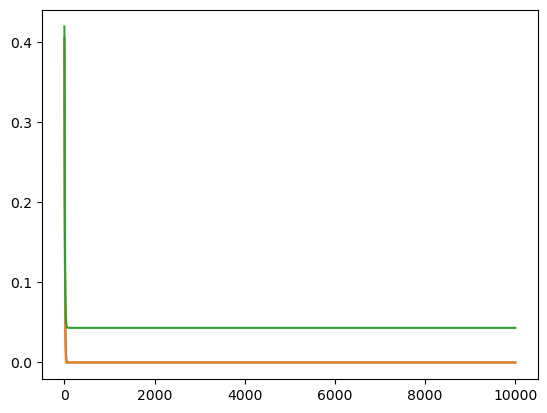

In [3]:
plt.plot(adn_fr)
plt.plot(hd_fr)
plt.plot(conj_fr)

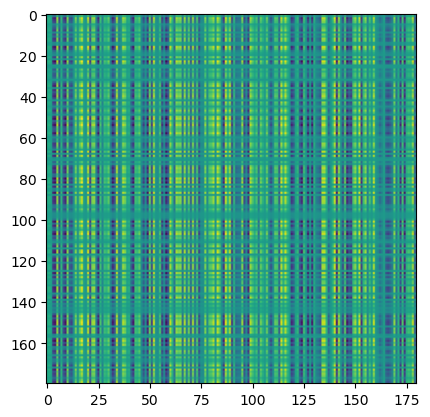

In [4]:
plt.imshow(w_adn_hd)

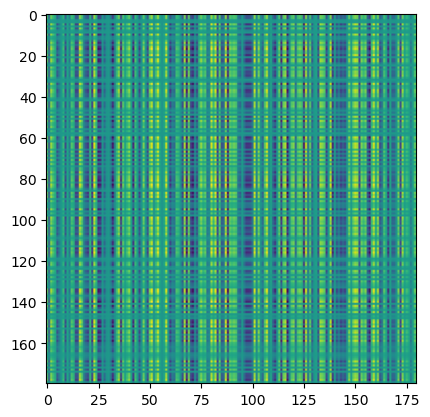

In [5]:
plt.imshow(w_hd_adn)

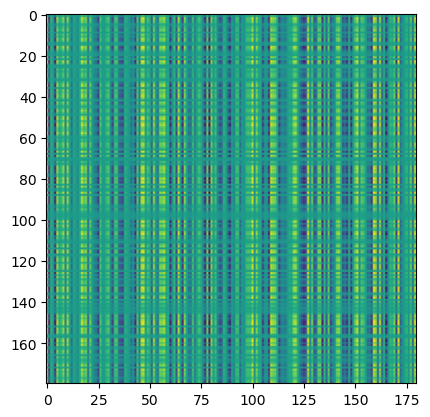

In [6]:
plt.imshow(w_hd_conj)